## The zip method

The `zip` method is very useful for Machine Learning or Data Science problem, because it comes handy when you need to iterate over features and labels at the same time.

I think it's easier to see it with an example: let's say you have some coordinates, `X`and `y`. If you have only one point, you can think to have something like:

In [1]:
X = 5
y = 1

and then to plot it you could do:

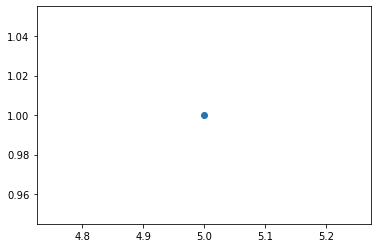

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X,y)

and you get your point. If you have multiple points, they are usually given with all the values of `X` in one list, and the value of the corresponding `y`s in another list, for example:

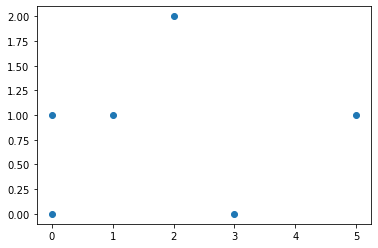

In [4]:
X = [0,5,3,2,1,0]
y = [1,1,0,2,1,0]

plt.scatter(X,y)

To plot a single point, you need to select the $i$-th term of `X` and the $i$-th term of `y`, for example doing something like this to plot the third (index 2, since Python starts from 0) point of the two lists:

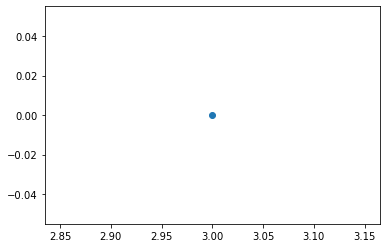

In [7]:
plt.scatter(X[2], y[2])

Now, what if you want to get the coordinates iteratively? 
For example in case you want to plot all the points one after the other, by using a for loop. How can you iterate over two lists at the same time?

This is where `zip`comes handy:

In [8]:
for i, j in zip(X, y):
    print(i, j)

0 1
5 1
3 0
2 2
1 1
0 0


If you want to inspect what it does:

In [9]:
list(zip(X,y))

[(0, 1), (5, 1), (3, 0), (2, 2), (1, 1), (0, 0)]

It's basically creating a list with tuples containing the $i$-th value of `X` with the $i$-th value of `y`!

You can use zip with multiple lists too:
    

In [11]:
a = [1,2,3,4,5]
b = ["a", "b", "c", "d", "e"]
c = [10, 9, 8, 7, 6]

In [13]:
for i, j, k in zip(a, b, c):
    print(i, j, k)

1 a 10
2 b 9
3 c 8
4 d 7
5 e 6


In [14]:
list(zip(a, b, c))

[(1, 'a', 10), (2, 'b', 9), (3, 'c', 8), (4, 'd', 7), (5, 'e', 6)]

What if the lists have different lengths? Let's try out:

In [15]:
a = [1,2,3]
b = ["a", "b", "c", "d"]
c = [10, 9, 8, 7, 6]

In [16]:
for i, j, k in zip(a, b, c):
    print(i, j, k)

1 a 10
2 b 9
3 c 8


It will stop at the length of the shortest one!

### Exercise

Given the following X and y, can you get an output like the one given as output
```
(1, 2) 1
(1, 3) 1
(3, 4) 1
(4, 5) 0
```
?

In [17]:
X = [(1,2), (1,3), (3,4), (4,5)]
y = [1, 1, 1, 0]

(1, 2) 1
(1, 3) 1
(3, 4) 1
(4, 5) 0


## Lambda functions

To define functions, usually you use a syntax like this:

In [20]:
def add_one(x):
    return x + 1

What this function is doing is to take an input `x`
 and return `x + 1`.

In [21]:
add_one(5)

6

You can define that function also by using a lambda expression:

In [22]:
add_one_lambda = lambda x: x + 1

In the example above, the expression is composed of:

The keyword: `lambda`

A bound variable: `x`

A body: `x + 1`

and the result is exactly the same as before:


In [23]:
add_one_lambda(5)

6

So the bound variable is the argument of your function, the body is what your function returns.

A cool features is that you can define and use the function in the same command:

In [24]:
(lambda x: x+1)(5)

6

without even have to give a name to that function! This can be useful when you need to define functions that you use only once, and maybe inside another function, for example, transforming a number into zero if it's negative:

In [37]:
def function(y):
    return y + (lambda x: x if x>=0 else 0)(y)

In [42]:
function(1), function(-5), function(6)

(2, -5, 12)

A common use is for applying a transformation to all the elements of a pandas Series or DataFrame:

In [44]:
import pandas as pd

In [45]:
df = pd.DataFrame({"column1":[1,-1,-5], "column2":[2,"0",1]})

In [46]:
df

,column1,column2
0,1,2
1,-1,0
2,-5,1


In [48]:
df["column1"] = df["column1"].apply(lambda x: 0 if x<0 else x)

In [49]:
df

,column1,column2
0,1,2
1,0,0
2,0,1


where you see that all the negative elements of the columns have been transformed into 0.

## Exercises

1. Convert the following functions in lambda functions:

In [50]:
def function1(x, y):
    # Oh no! Multiple inputs! That's new!
    return x + y

def function2(j):
    if j > 0:
        return "positive"
    else:
        return "negative"

In [54]:
function1(1,2)

3

In [55]:
function2(5)

'positive'

In [56]:
function2(-1)

'negative'

Transform all the negative elements of the columns "hi", "hey", and "hello" of the dataframe `df` into the string "hello".

In [100]:
df = pd.DataFrame({"first":[1,-1,1.0,0.0],
                   "hi":[0.1,0.0,1,-1],
                  "hey":[1,-1,0,0.0],
                  "fourth":[1,-1,2,0.0],
                  "hello":[1,-1.9,0,2.0]
                  })

In [101]:
df

,first,hi,hey,fourth,hello
0,1.0,0.1,1.0,1.0,1.0
1,-1.0,0.0,-1.0,-1.0,-1.9
2,1.0,1.0,0.0,2.0,0.0
3,0.0,-1.0,0.0,0.0,2.0


In [103]:
df

,first,hi,hey,fourth,hello
0,1.0,0.1,1.0,1.0,1.0
1,-1.0,0.0,hello,-1.0,hello
2,1.0,1.0,0.0,2.0,0.0
3,0.0,hello,0.0,0.0,2.0
